**LILLIAN MWIHAKI MUCHOKI KPSK-DeKUT-2-18**

**Smart Water Safety Monitoring for Bottling Industries**

This project aims to develop a machine learning model that evaluates the safety of tap water for bottling purposes in various countries. By analyzing key water quality indicators such as contaminant levels, pH, turbidity, dissolved oxygen, nitrate levels, and bacteria counts, the model will provide safety predictions to help bottler companies assess whether tap water is suitable for bottling. The goal is to ensure that the water meets safety standards for public consumption and quality control in the bottling industry.

In [73]:
import pandas as pd
df=pd.read_csv('water_pollution_disease.csv')

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [75]:
df.describe()

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.012667,4.954390,7.255847,2.480023,6.492850,25.08025,10.047913,2488.477333,64.612333,249.776667,24.25100,49.270000,50.811900,50036.196667,50.029193,50.062480,60.371007,1591.849000,20.130917,505.390333
std,7.229287,2.860072,0.720464,1.419984,2.027966,14.50517,5.798238,1431.421553,20.308463,144.111543,14.33259,28.984165,28.465323,28598.750508,28.896676,22.779125,23.159678,817.502434,11.689244,283.275224
min,2000.000000,0.000000,6.000000,0.000000,3.000000,0.05000,0.000000,0.000000,30.010000,0.000000,0.00000,0.000000,2.060000,521.000000,0.190000,10.030000,20.010000,200.000000,0.060000,10.000000
25%,2006.000000,2.560000,6.630000,1.257500,4.710000,12.52500,5.120000,1268.000000,47.027500,124.000000,12.00000,24.000000,26.467500,25010.250000,24.982500,30.557500,40.440000,865.750000,9.840000,254.750000
50%,2012.000000,4.950000,7.280000,2.460000,6.490000,24.79000,10.065000,2469.000000,64.780000,248.000000,24.00000,49.000000,50.230000,49621.500000,50.390000,49.795000,60.580000,1572.000000,20.175000,513.000000
75%,2018.000000,7.400000,7.870000,3.660000,8.252500,37.91000,15.032500,3736.250000,82.302500,378.000000,37.00000,75.000000,76.260000,74778.250000,74.817500,69.727500,80.420000,2308.250000,30.672500,745.000000
max,2024.000000,10.000000,8.500000,4.990000,10.000000,49.99000,20.000000,4998.000000,99.990000,499.000000,49.00000,99.000000,99.990000,99948.000000,99.980000,89.980000,99.990000,2999.000000,39.990000,999.000000


In [76]:
df.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


In [77]:
df.columns

Index(['Country', 'Region', 'Year', 'Water Source Type',
       'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)',
       'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)',
       'Water Treatment Method', 'Access to Clean Water (% of Population)',
       'Diarrheal Cases per 100,000 people',
       'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people',
       'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)',
       'Healthcare Access Index (0-100)', 'Urbanization Rate (%)',
       'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)',
       'Temperature (°C)', 'Population Density (people per km²)'],
      dtype='object')

In [78]:
# Print all unique values in the 'Country' column
print(df['Country'].unique())

['Mexico' 'Brazil' 'Indonesia' 'Nigeria' 'Ethiopia' 'China' 'Bangladesh'
 'India' 'USA' 'Pakistan']


In [79]:
df.dtypes

Country                                           object
Region                                            object
Year                                               int64
Water Source Type                                 object
Contaminant Level (ppm)                          float64
pH Level                                         float64
Turbidity (NTU)                                  float64
Dissolved Oxygen (mg/L)                          float64
Nitrate Level (mg/L)                             float64
Lead Concentration (µg/L)                        float64
Bacteria Count (CFU/mL)                            int64
Water Treatment Method                            object
Access to Clean Water (% of Population)          float64
Diarrheal Cases per 100,000 people                 int64
Cholera Cases per 100,000 people                   int64
Typhoid Cases per 100,000 people                   int64
Infant Mortality Rate (per 1,000 live births)    float64
GDP per Capita (USD)           

In [80]:
df.isnull().sum()

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               

In [81]:
df['Water Treatment Method'] = df['Water Treatment Method'].fillna(df['Water Treatment Method'].mode()[0])

In [82]:
df.isnull().sum()

Country                                          0
Region                                           0
Year                                             0
Water Source Type                                0
Contaminant Level (ppm)                          0
pH Level                                         0
Turbidity (NTU)                                  0
Dissolved Oxygen (mg/L)                          0
Nitrate Level (mg/L)                             0
Lead Concentration (µg/L)                        0
Bacteria Count (CFU/mL)                          0
Water Treatment Method                           0
Access to Clean Water (% of Population)          0
Diarrheal Cases per 100,000 people               0
Cholera Cases per 100,000 people                 0
Typhoid Cases per 100,000 people                 0
Infant Mortality Rate (per 1,000 live births)    0
GDP per Capita (USD)                             0
Healthcare Access Index (0-100)                  0
Urbanization Rate (%)          

**DATA VISUALIZATION**

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

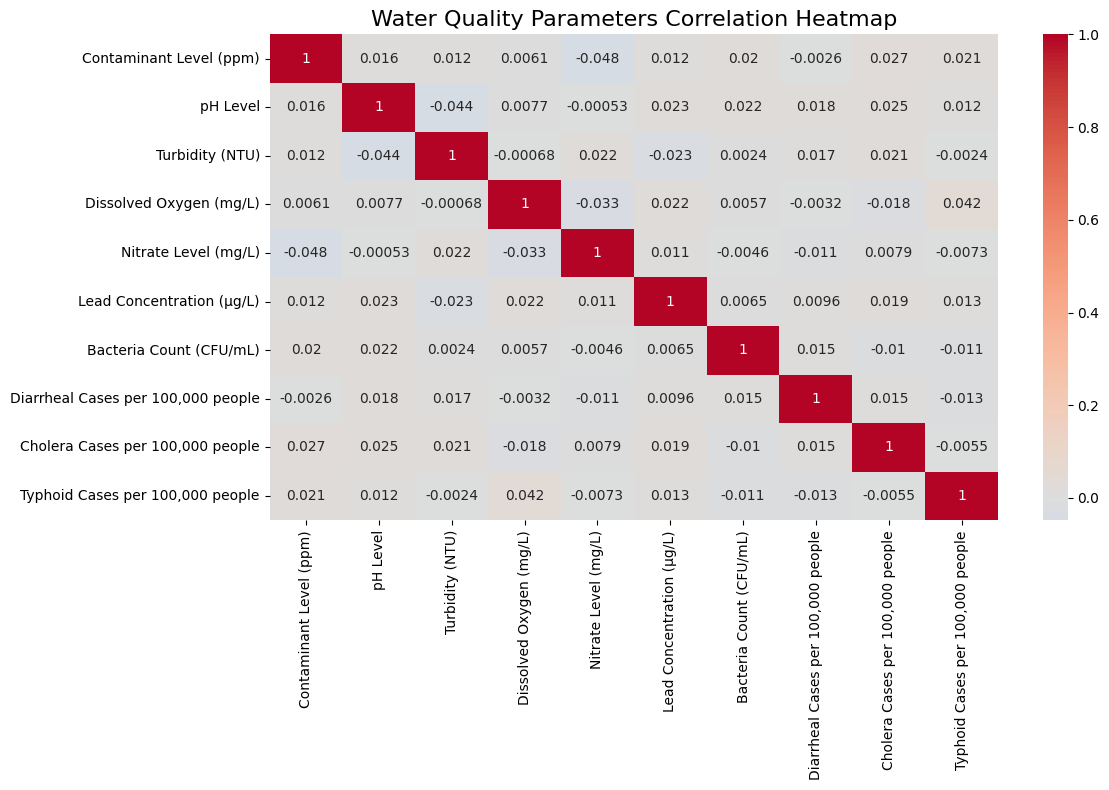

In [84]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df[['Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 
             'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)',
             'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)',
             'Diarrheal Cases per 100,000 people', 
             'Cholera Cases per 100,000 people',
             'Typhoid Cases per 100,000 people']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Water Quality Parameters Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

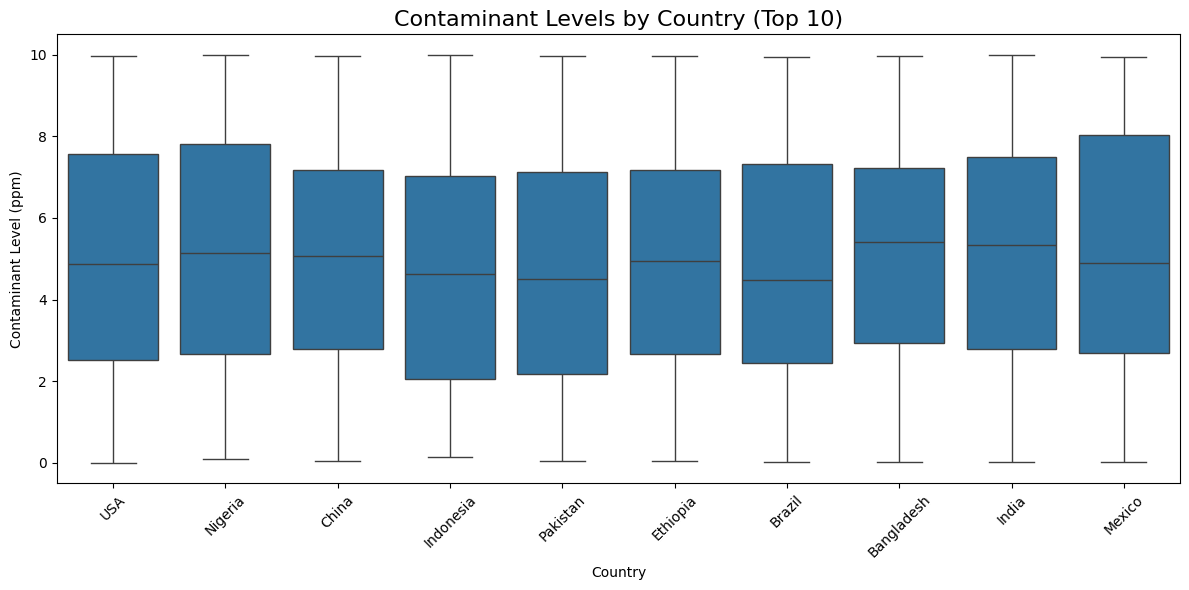

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with appropriate size
plt.figure(figsize=(12, 6))

# Get the top 10 countries by frequency
top_countries = df['Country'].value_counts().index[:10]

# Create a boxplot
sns.boxplot(x='Country', y='Contaminant Level (ppm)', 
            data=df[df['Country'].isin(top_countries)], 
            order=top_countries)

# Set the title and labels
plt.title('Contaminant Levels by Country (Top 10)', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('contaminant_by_country.png')

# Show the plot
plt.show()


**FEATURE ENGINEERING**

In [86]:
# Feature engineering
# Create binary target variable (1=unsafe, 0=safe) based on disease cases and water quality
df['water_safe'] = ((df['Diarrheal Cases per 100,000 people'] > 200) | 
                      (df['Cholera Cases per 100,000 people'] > 20) |
                      (df['Contaminant Level (ppm)'] > 5) |
                      (df['Bacteria Count (CFU/mL)'] > 1000)).astype(int)

In [89]:
features = ['Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 
            'Dissolved Oxygen (mg/L)', 'Access to Clean Water (% of Population)']

In [90]:
#Training the data

X = df[features]
y = df['water_safe']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, 'water_safety_model.pkl')

Accuracy: 0.9866666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.99      1.00      0.99       592

    accuracy                           0.99       600
   macro avg       0.49      0.50      0.50       600
weighted avg       0.97      0.99      0.98       600



c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

['water_safety_model.pkl']